In [1]:
# Here I will resize the VinDR dataset images that has passed the filtering.
# Plus TODO: normalize the images [0, 1] for the training.

In [11]:
import cv2


def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

Original Dimensions :  (2618, 879, 3)
Resized Dimensions :  (1524, 512, 3)


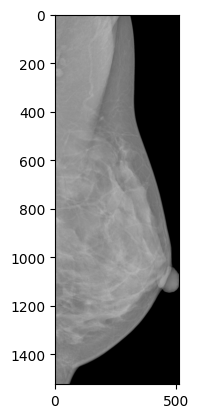

In [14]:
from matplotlib import pyplot as plt
 
img = cv2.imread('/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/0a1dfa3cc1714e83df8d5679705f897b.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)

scale_percent = 20 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
  
# resize image
resized = image_resize(img, 512, 512)
 
print('Resized Dimensions : ',resized.shape)

#Show the image with matplotlib
plt.imshow(resized)
plt.show()

Original Dimensions :  (2421, 941, 3)
Resized Dimensions :  (512, 199, 3)
Original Dimensions of Resized image :  (512, 199, 3)
Resized Dimensions :  (512, 512, 3)


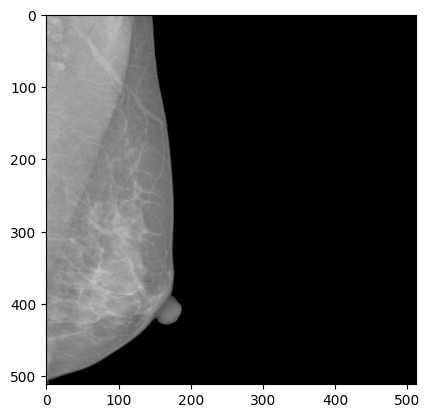

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# img = cv2.imread('/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/139179b3572bf8dc5376c771bea8e7a9.png', cv2.IMREAD_UNCHANGED)
 
# print('Original Dimensions : ',img.shape)

def resize_mammograms(img, goal_size):
    """
    """
    img = cv2.imread(img, cv2.IMREAD_UNCHANGED)
 

    # Get the current dimensions of the image
    print('Original Dimensions : ',img.shape)
    height, width = img.shape[:2]
    
    if height > width:
        # Set the new dimensions with respect to the aspect ratio of the height.
        new_height = goal_size
        new_width = int(width * new_height / height)
    elif height < width:
        # Set the new dimensions with respect to the aspect ratio of the width.
        new_height = goal_size
        new_width = int(width * new_height / height)
    elif height == width:
        # Set the new dimensions of a square.
        new_height = goal_size
        new_width = goal_size
    else:
        raise("Something spooky with the dimensions of the image: " + img)
    
    dim = (new_width, new_height)


    # Resize the image
    resized = cv2.resize(img, (dim))

    print('Resized Dimensions : ',resized.shape)

    return resized

def add_padding(resized_image, goal_dimension):
    
    # Get the current dimensions of the image
    print('Original Dimensions of Resized image : ' ,resized_image.shape)
    new_height, new_width = resized_image.shape[:2]

    if new_height == goal_dimension:
        
        # Pad the image to make it 512x512
        pad_width = goal_dimension - new_width
        left_pad = int(pad_width / 2)
        right_pad = pad_width
        padded_img = np.pad(resized_image, ((0, 0), (0, pad_width), (0, 0)), mode='constant', constant_values=0)

        print('Resized Dimensions : ' ,padded_img.shape)

    elif new_width == goal_dimension:
        
        # Pad the image to make it 512x512
        pad_height = goal_dimension - new_height
        left_pad = pad_height
        padded_img = np.pad(resized_image, ((0, 0), (pad_height, 0), (0, 0)), mode='constant', constant_values=0)

        print('Resized Dimensions : ' ,padded_img.shape)


    else:
        raise("Somethis spooky with the dimensions of the image: " ,resized_image)
    
    return padded_img

def get_square_mammogram(image, square_dimension):

    resizedMammo = resize_mammograms(image, square_dimension)
    paddedImage = add_padding(resizedMammo, square_dimension)

    return paddedImage 


padded_img = get_square_mammogram('/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/139179b3572bf8dc5376c771bea8e7a9.png', 512)
#Show the image with matplotlib
plt.imshow(padded_img)
plt.show()


In [40]:
# TODO: Make of MLO's into 512x512.
#       Normalize them.
#       Save them to the same location.

import os
from skimage import img_as_ubyte

DIR = "/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages"
writeDIR = "/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/512Mammograms"
DIMENSION = 512
total = len(os.listdir(DIR))

for index, filename in enumerate(os.listdir(DIR)):
    
    count_deleted = 0
    # Open the image file
    image_path = os.path.join(DIR, filename)
    goal_path = os.path.join(writeDIR, filename)
    # Print the image path.
    print(image_path)


    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    #new_height, new_width = img.shape[:2]

    if img is None:
        count_deleted += 1
        os.remove(image_path)
    else:
        # elif (img.shape[:2] != (512,512)):
        # Make the image a square with a fair padding to the right.
        padimg = get_square_mammogram(image_path, 512)

        # Since we have 8-bit images with ranges of intensity [0, 255], 
        # dividing with 255 will do the trick to normalize the mammograms on [0, 1]. 
        # Necessary for the training of the gans.
        normalized_image = padimg/255
        #normalized_image = cv2.normalize(padimg, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        # Using cv2.imwrite() method
        # Saving the image
        normalized_image = img_as_ubyte(normalized_image)
        cv2.imwrite(goal_path, normalized_image)

    #Show the image with matplotlib
    #plt.imshow(normalized_image)
    #plt.show()
    #print(padimg/255)

    print("Processed " + str(index) + " out of " + str(total))

print("Deleted .. " + str(count_deleted))

/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/139179b3572bf8dc5376c771bea8e7a9.png
Original Dimensions :  (2421, 941, 3)
Resized Dimensions :  (512, 199, 3)
Original Dimensions of Resized image :  (512, 199, 3)
Resized Dimensions :  (512, 512, 3)
Processed 0 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/b529216f44cef28e398414ffcd37b138.png
Original Dimensions :  (2459, 891, 3)
Resized Dimensions :  (512, 185, 3)
Original Dimensions of Resized image :  (512, 185, 3)
Resized Dimensions :  (512, 512, 3)
Processed 1 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/8c9ee8c6aedf3638092a614f3e4d770c.png
Original Dimensions :  (2639, 985, 3)
Resized Dimensions :  (512, 191, 3)
Original Dimensions of Resized image :  (512, 191, 3)
Resized Dimensions :  (512, 512, 3)
Processed 2 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/dat

libpng error: Read Error


Original Dimensions :  (2639, 1119, 3)
Resized Dimensions :  (512, 217, 3)
Original Dimensions of Resized image :  (512, 217, 3)
Resized Dimensions :  (512, 512, 3)
Processed 1716 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/aac2a350079dba9b8ab390fa4efefad7.png
Original Dimensions :  (2818, 1016, 3)
Resized Dimensions :  (512, 184, 3)
Original Dimensions of Resized image :  (512, 184, 3)
Resized Dimensions :  (512, 512, 3)
Processed 1717 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/8dec8afdd2e51ec994fd1c168768097b.png
Original Dimensions :  (2869, 1023, 3)
Resized Dimensions :  (512, 182, 3)
Original Dimensions of Resized image :  (512, 182, 3)
Resized Dimensions :  (512, 512, 3)
Processed 1718 out of 5518
/home/amargkas/AggelosThesis/data/VinDR/data/source/processedMLO/healthyMLOwithReversedImages/89335456051c3ca9caf19b8c8a5b1871.png
Original Dimensions :  (2595, 8